In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 层次化索引
- 能在一个轴上拥有多个索引

In [2]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.381705
   2   -0.011382
   3   -2.123527
b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
d  2    0.474225
   3   -0.450007
dtype: float64

In [3]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [4]:
data['b']

1    0.186163
3    0.671735
dtype: float64

In [6]:
data['b':'c']

b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
dtype: float64

In [7]:
data.loc[['b','c']]

b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
dtype: float64

In [8]:
data[['b','c']]

b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
dtype: float64

In [10]:
data.iloc[1:4]

a  2   -0.011382
   3   -2.123527
b  1    0.186163
dtype: float64

In [12]:
print(data)
data[:,2]  #没出错，但不要用

a  1    0.381705
   2   -0.011382
   3   -2.123527
b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
d  2    0.474225
   3   -0.450007
dtype: float64


a   -0.011382
c    0.951669
d    0.474225
dtype: float64

In [14]:
data.loc[:,2] #内层索引为2的。

a   -0.011382
c    0.951669
d    0.474225
dtype: float64

- 层次化索引在数据重塑和基于分组的操作（如透视表生成）中扮演着重要的角色。
例如，可以通过unstack方法将这段数据重新安排到一个DataFrame中

In [19]:
data.unstack()

,1,2,3
a,0.381705,-0.011382,-2.123527
b,0.186163,NaN,0.671735
c,0.791394,0.951669,NaN
d,NaN,0.474225,-0.450007


- 逆运算是stack

In [20]:
data.unstack().stack()

a  1    0.381705
   2   -0.011382
   3   -2.123527
b  1    0.186163
   3    0.671735
c  1    0.791394
   2    0.951669
d  2    0.474225
   3   -0.450007
dtype: float64

- 对于一个DataFrame，每条轴都可以有分层索引

In [21]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

- 各层都可以有名字（可以是字符串，也可以是别的Python对象）。如果指定了名
称，它们就会显示在控制台输出中

In [22]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [23]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

- 可以单独创建MultiIndex然后复用

In [32]:
# MultiIndex.from_arrays

pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                       names=['state', 'color'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           labels=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

# 重排与分级排序
- 有时，你需要重新调整某条轴上各级别的顺序，或根据指定级别上的值对数据进行
排序。swaplevel接受两个级别编号或名称，并返回一个互换了级别的新对象（但
数据不会发生变化）

In [33]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [34]:
frame.sort_index()

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [35]:
frame.sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [36]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [39]:
print(frame)
frame.swaplevel().sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [40]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [41]:
frame.swaplevel(1,0).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [42]:
frame.swaplevel(1,0).sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

# 根据级别汇总统计
- 许多对DataFrame和Series的描述和汇总统计都有一个level选项，它用于指定在
某条轴上求和的级别。再以上面那个DataFrame为例，我们可以根据行或列上的
级别来进行求和

In [43]:
print(frame)
frame.sum(level='key2')

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [44]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

# 使用DataFrame的列进行索引
- 将df中的列当做行索引，或将行索引变成列。

In [45]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


- DataFrame的set_index函数会将其一个或多个列转换为行索引，并创建一个新的
DataFrame

In [46]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

- 默认情况下，转化为行索引的那些列会从DataFrame中移除，但也可以将其保留下来

In [47]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

- reset_index的功能跟set_index刚好相反，层次化索引的级别会被转移到列里面

In [48]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# 8.2 合并数据集
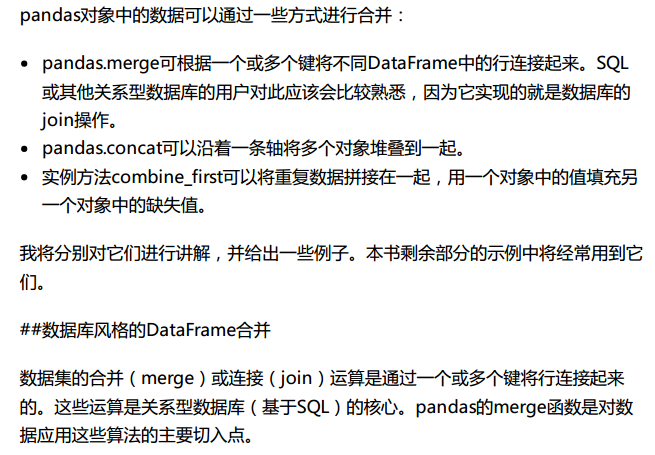

In [49]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [50]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [51]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


- 没有指明要用哪个列进行连接。如果没有指定，merge就会将重叠列的
列名当做键。不过，最好明确指定一下

In [52]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


- 默认情况下，
merge做的是“内连接”；结果中的键是交集。其他方式还有"left"、"right"以
及"outer"。外连接求取的是键的并集，组合了左连接和右连接的效果

In [53]:
pd.merge(df1,df2,how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


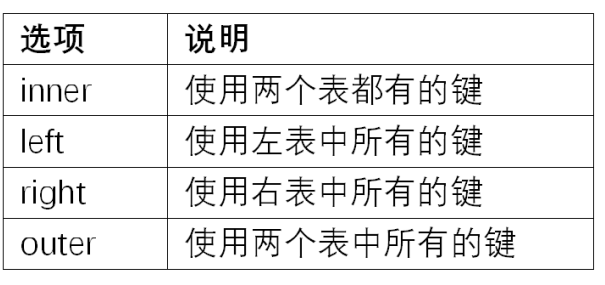

In [54]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [55]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [56]:
pd.merge(df1,df2,on='key',how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [57]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


#### 注意：在进行列－列连接时，DataFrame对象中的索引会被丢弃

- 对于合并运算需要考虑的最后一个问题是对重复列名的处理。虽然你可以手工处理
列名重叠的问题（查看前面介绍的重命名轴标签），但merge有一个更实用的
suffixes选项，用于指定附加到左右两个DataFrame对象的重叠列名上的字符串

In [58]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [59]:
pd.merge(left, right, on='key1', suffixes=('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


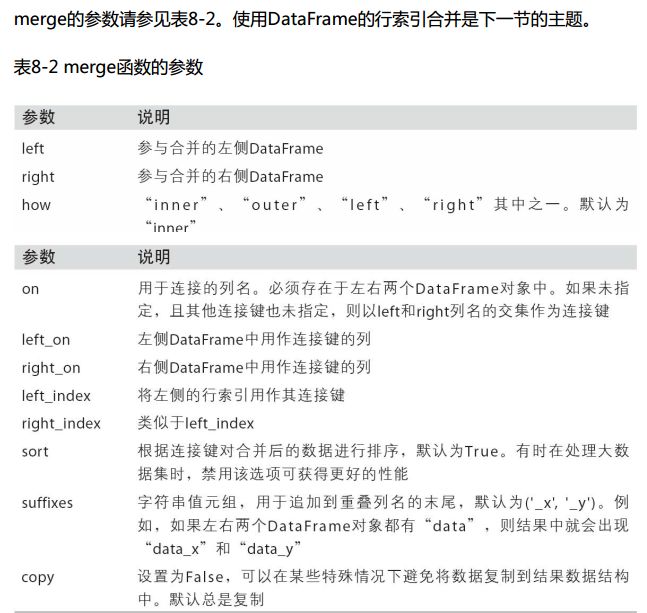

## 索引上的合并
- 有时候，DataFrame中的连接键位于其索引中。在这种情况下，你可以传入
left_index=True或right_index=True（或两个都传）以说明索引应该被用作连接
键：

In [60]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [61]:
right1

,group_val
a,3.5
b,7.0


In [62]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


- 默认为取连接键的交集，使用outer外连接取并集。

In [63]:
pd.merge(left1,right1,left_on='key',right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


- 对于层次化索引的数据，事情就有点复杂了，因为索引的合并默认是多键合并

In [64]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [65]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [66]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [67]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True,how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [68]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [69]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [70]:
pd.merge(left2,right2,left_index=True,right_index=True)

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [71]:
pd.merge(left2,right2,left_index=True,right_index=True, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


- DataFrame还有一个便捷的join实例方法，它能更为方便地实现按索引合并。它还
可用于合并多个带有相同或相似索引的DataFrame对象，但要求没有重叠的列。
在上面那个例子中，我们可以编写：

In [73]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


- 因为一些历史版本的遗留原因，DataFrame的join方法默认使用的是左连接，保留
左边表的行索引。它还支持在调用的DataFrame的列上，连接传递的DataFrame
索引

In [74]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [75]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [78]:
print(right2)
[right2, another]

   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0


[   Missouri  Alabama
 b       7.0      8.0
 c       9.0     10.0
 d      11.0     12.0
 e      13.0     14.0,    New York  Oregon
 a       7.0     8.0
 c       9.0    10.0
 e      11.0    12.0
 f      16.0    17.0]

- 向join传入一组DataFrame

In [80]:
print(left2)
left2.join([right2, another])

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [81]:
left2.join([right2, another], how='outer')

d:\python35\lib\site-packages\pandas\core\frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


## 轴向连接
- 另一种数据合并运算也被称作连接（concatenation）、绑定（binding）或堆叠
（stacking）。NumPy的concatenation函数可以用NumPy数组来做

In [82]:
arr = np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [83]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

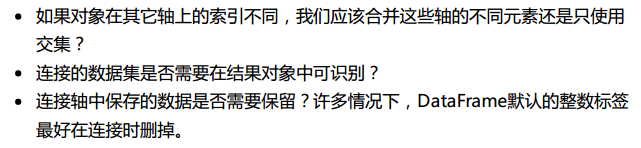

In [84]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [85]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [86]:
pd.concat([s1,s2,s3],axis=1)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [87]:
s4 = pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [88]:
pd.concat([s1,s4], axis=1)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [89]:
# join='inner'
pd.concat([s1,s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


- 通过join_axes指定要在其它轴上使用的索引

In [90]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


- 不过有个问题，参与连接的片段在结果中区分不开。假设你想要在连接轴上创建一
个层次化索引。使用keys参数即可达到这个目的

In [91]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [92]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


- 如果沿着axis=1对Series进行合并，则keys就会成为DataFrame的列头

In [94]:
pd.concat([s1, s2, s3], keys=['one', 'two', 'three'],axis=1)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [95]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [96]:
df2

,three,four
a,5,6
c,7,8


In [97]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

- 传入的不是列表而是一个字典，则字典的键就会被当做keys选项的值

In [98]:
pd.concat({'level1':df1,'level2':df2}, axis=1)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

- 用于管理层次化索引创建方式的参数,使用names命名轴属性，从而管理轴

In [99]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

d:\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

- 行索引没有数据，为默认自动添加的整数索引，使用ignore_index=True,
- 这个参数设置常见于excel生成。

In [100]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

,a,b,c,d
0,-0.742018,-1.387725,-0.211431,1.180386
1,0.834852,-1.946284,0.312261,2.085278
2,-0.688458,0.823764,0.871808,0.316069


In [101]:
df2

,b,d,a
0,0.397078,-1.253758,-0.832066
1,1.103263,0.140246,-0.132378


In [103]:
pd.concat([df1, df2], ignore_index=True,sort=False)

,a,b,c,d
0,-0.742018,-1.387725,-0.211431,1.180386
1,0.834852,-1.946284,0.312261,2.085278
2,-0.688458,0.823764,0.871808,0.316069
3,-0.832066,0.397078,NaN,-1.253758
4,-0.132378,1.103263,NaN,0.140246


## 合并重叠数据
- 还有一种数据组合问题不能用简单的合并（merge）或连接（concatenation）运
算来处理。比如说，你可能有索引全部或部分重叠的两个数据集。举个有启发性的
例子，我们使用NumPy的where函数，它表示一种等价于面向数组的if-else

In [104]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [105]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [106]:
np.where(a.isnull,b,a)

array([ 0.,  1.,  2.,  3.,  4., nan])

- combine_first可实现一样的功能
- 用传递对象中的数据为调用对象的缺失数据“打补丁

In [107]:
b.combine_first(a)

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [108]:
a.combine_first(b)

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    NaN
dtype: float64

# 8.3 重塑和轴向旋转
- 有许多用于重新排列表格型数据的基础运算。这些函数也称作重塑（reshape）或
轴向旋转（pivot）运算。


## 重塑层次化索引
#### 层次化索引为DataFrame数据的重排任务提供了一种具有良好一致性的方式。主要功能有二：
- stack：将数据的列“旋转”为行。
- unstack：将数据的行“旋转”为列。

In [109]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [110]:
result = data.stack()
result
# 列转成了行，但行没转成列，所以不是转置的效果

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

- 默认情况下，unstack操作的是最内层（stack也是如此）。传入分层级别的编号
或名称即可对其它级别进行unstack操作

In [111]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [113]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


- 如果不是所有的级别值都能在各分组中找到的话，则unstack操作可能会引入缺失
数据

In [114]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [115]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


- stack默认会滤除缺失数据，因此该运算是可逆的

In [116]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

- 在对DataFrame进行unstack操作时，作为旋转轴的级别将会成为结果中的最低级
别：

In [117]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [118]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

- 当调用stack，我们可以指明轴的名字

In [120]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

## 将“长格式”旋转为“宽格式”
多个时间序列数据通常是以所谓的“长格式”（long）或“堆叠格
式”（stacked）存储在数据库和CSV中的。

In [121]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [123]:
periods = pd.PeriodIndex(year=data.year,quarter=data.quarter,name='data')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='data', length=203, freq='Q-DEC')

In [124]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.head()

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [125]:
data.index = periods.to_timestamp('D','end')
data.head()

item,realgdp,infl,unemp
data,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2


In [127]:
ldata = data.stack().reset_index().rename(columns={0:'value'})
ldata.head()

,data,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340


- 这就是多个时间序列（或者其它带有两个或多个键的可观察数据，这里，我们的键
是date和item）的长格式。表中的每行代表一次观察。关系型数据库（如MySQL）中的数据经常都是这样存储的，因为固定架构（即列
名和数据类型）有一个好处：随着表中数据的添加，item列中的值的种类能够增
加。在前面的例子中，date和item通常就是主键（用关系型数据库的说法），不
仅提供了关系完整性，而且提供了更为简单的查询支持。有的情况下，使用这样的
数据会很麻烦，你可能会更喜欢DataFrame，不同的item值分别形成一列，date
列中的时间戳则用作索引。DataFrame的pivot方法完全可以实现这个转换

In [130]:
pivoted = ldata.pivot('data','item','value')
pivoted.head()
# 前两个传递的值分别用作行和列索引，最后一个可选值则是用于填充DataFrame的数据列。假设有两个需要同时重塑的数据列

item,infl,realgdp,unemp
data,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [131]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,data,item,value,value2
0,1959-03-31,realgdp,2710.349,-1.516290
1,1959-03-31,infl,0.000,0.139442
2,1959-03-31,unemp,5.800,-0.686870
3,1959-06-30,realgdp,2778.801,0.729403
4,1959-06-30,infl,2.340,0.536502
5,1959-06-30,unemp,5.100,0.868323
6,1959-09-30,realgdp,2775.488,-1.085092
7,1959-09-30,infl,2.740,0.057171
8,1959-09-30,unemp,5.300,-0.229848
9,1959-12-31,realgdp,2785.204,1.109315


- 如果忽略最后一个参数，得到的DataFrame就会带有层次化的列
- 好像excel的透视表

In [133]:
pivoted = ldata.pivot('data','item')
# pivoted[:5]
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
data                                                          
1959-03-31  0.00  2710.349   5.8  0.139442 -1.516290 -0.686870
1959-06-30  2.34  2778.801   5.1  0.536502  0.729403  0.868323
1959-09-30  2.74  2775.488   5.3  0.057171 -1.085092 -0.229848
1959-12-31  0.27  2785.204   5.6  0.821111  1.109315  0.560254
1960-03-31  2.31  2847.699   5.2 -0.721352  0.657312 -0.718331

- 注意，pivot其实就是用set_index创建层次化索引，再用unstack重塑

In [136]:
ldata.set_index(['data', 'item']).head()

value    value2
data       item                       
1959-03-31 realgdp  2710.349 -1.516290
           infl        0.000  0.139442
           unemp       5.800 -0.686870
1959-06-30 realgdp  2778.801  0.729403
           infl        2.340  0.536502

In [138]:
unstacked = ldata.set_index(['data', 'item']).unstack('item')
unstacked.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
data                                                          
1959-03-31  0.00  2710.349   5.8  0.139442 -1.516290 -0.686870
1959-06-30  2.34  2778.801   5.1  0.536502  0.729403  0.868323
1959-09-30  2.74  2775.488   5.3  0.057171 -1.085092 -0.229848
1959-12-31  0.27  2785.204   5.6  0.821111  1.109315  0.560254
1960-03-31  2.31  2847.699   5.2 -0.721352  0.657312 -0.718331

## 将“宽格式”旋转为“长格式”
旋转DataFrame的逆运算是pandas.melt。它不是将一列转换到多个新的
DataFrame，而是合并多个列成为一个，产生一个比输入长的DataFrame

In [139]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,A,B,C,key
0,1,4,7,foo
1,2,5,8,bar
2,3,6,9,baz


- key列可能是分组指标，其它的列是数据值。
- 当使用pandas.melt，我们必须指明哪些列是分组指标。下面使用key作为唯一的分组指标

In [140]:
melted = pd.melt(df,['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


- 使用pivot，可以重塑回原来的样子

In [141]:
reshaped = melted.pivot('key','variable','value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


- 因为pivot的结果从列创建了一个索引，用作行标签，我们可以使用reset_index将
数据移回列

In [142]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


- 指定列的子集，作为值的列

In [143]:
df

,A,B,C,key
0,1,4,7,foo
1,2,5,8,bar
2,3,6,9,baz


In [144]:
pd.melt(df,id_vars=['key'],value_vars=['A','B'])
# C列数据丢弃了

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


- pandas.melt也可以不用分组指标

In [145]:
pd.melt(df,value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9
